In [13]:
import numpy as np
import numpy.random as rdm
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#we are going to have a look at greeks of best-of/worst-of options with 2 underlyings
#prices will be computed using Monte-Carlo simulations for 2 assets

def restore_params():
    global r,sigma1, sigma2, T, t, K, S1, S2, rho, N, eps
    r = 0
    sigma1 = 0.25
    sigma2 = 0.30
    T =1
    t =0
    K = 1
    S1 = np.arange(0.8,1.2,0.01)
    S2 = np.ones(S1.shape)
    rho = 0.4
    N = 10000
    eps = 10**(-5) #used for finite differences to compute greeks
    return None

def corr(rho):
    return np.asarray([[1, 0],[rho, np.sqrt(1-rho**2)]])

def sigma(sigma1, sigma2):
    return np.asarray([[sigma1, 0],[0, sigma2]])

def exp_part(r, t, T, sigma1,sigma2, rho, gauss):
    drift = (r - 0.5 *np.concatenate((sigma1**2 * np.ones((1,N)), sigma2**2 * np.ones((1,N))), axis = 0 )) * (T-t)
    brownian = np.dot(np.dot(sigma(sigma1, sigma2), corr(rho)), np.sqrt(T-t) * gauss)
    return np.exp(drift + brownian)
       
def Call_bo(S1, S2,r, t, T, K, sigma1,sigma2, rho, gauss):
    m = S1.shape[0]
    price = np.zeros(S1.shape)
    exp_ret = exp_part(r, t, T, sigma1,sigma2, rho, gauss)
    for i in range(N):
        for j in range(m):
            price[j] += max(max(exp_ret[0,i] * S1[j], exp_ret[1,i] * S2[j]) -K, 0)
    for j in range(m):
        price[j] *= np.exp(-r*(T-t)) / N
    return price
    
def Call_wo(S1, S2,r, t, T, K, sigma1,sigma2, rho, gauss):
    m = S1.shape[0]
    price = np.zeros(S1.shape)
    exp_ret = exp_part(r, t, T, sigma1,sigma2, rho, gauss)
    for i in range(N):
        for j in range(m):
            price[j] += max(min(exp_ret[0,i] * S1[j], exp_ret[1,i] * S2[j]) -K, 0)
    for j in range(m):
        price[j] *= np.exp(-r*(T-t)) / N
    return price

def Put_wo(S1, S2,r, t, T, K, sigma1,sigma2, rho, gauss):
    m = S1.shape[0]
    price = np.zeros(S1.shape)
    exp_ret = exp_part(r, t, T, sigma1,sigma2, rho, gauss)
    for i in range(N):
        for j in range(m):
            price[j] += max(K-min(exp_ret[0,i] * S1[j], exp_ret[1,i] * S2[j]), 0)
    for j in range(m):
        price[j] *= np.exp(-r*(T-t)) / N
    return price

restore_params()

In [14]:
#random variable used for the rest of the code
gauss = rdm.normal(0,1,(2,N))


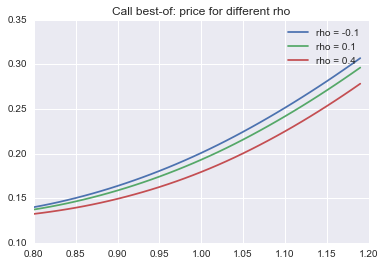

In [15]:
#call best of prices
plt.plot(S1,Call_bo(S1, S2,r, t, T, K, sigma1,sigma2, -0.1, gauss ), label = 'rho = -0.1' )
plt.plot(S1,Call_bo(S1, S2,r, t, T, K, sigma1,sigma2, 0.1, gauss ), label = 'rho = 0.1' )
plt.plot(S1,Call_bo(S1, S2,r, t, T, K, sigma1,sigma2, 0.4, gauss ), label = 'rho = 0.4' )

plt.title('Call best-of: price for different rho')
plt.legend()
plt.show()


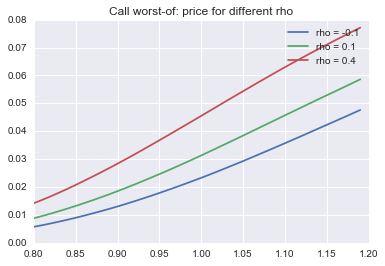

In [16]:
# call worst of price

plt.plot(S1,Call_wo(S1, S2,r, t, T, K, sigma1,sigma2, -0.1, gauss ), label = 'rho = -0.1' )
plt.plot(S1,Call_wo(S1, S2,r, t, T, K, sigma1,sigma2, 0.1, gauss ), label = 'rho = 0.1' )
plt.plot(S1,Call_wo(S1, S2,r, t, T, K, sigma1,sigma2, 0.4, gauss ), label = 'rho = 0.4' )

plt.title('Call worst-of: price for different rho')
plt.legend()
plt.show()

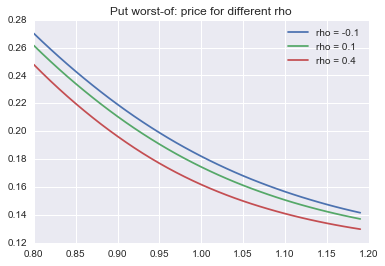

In [17]:
#put worst of price
plt.plot(S1,Put_wo(S1, S2,r, t, T, K, sigma1,sigma2, -0.1, gauss ), label = 'rho = -0.1' )
plt.plot(S1,Put_wo(S1, S2,r, t, T, K, sigma1,sigma2, 0.1, gauss ), label = 'rho = 0.1' )
plt.plot(S1,Put_wo(S1, S2,r, t, T, K, sigma1,sigma2, 0.4, gauss ), label = 'rho = 0.4' )

plt.title('Put worst-of: price for different rho')
plt.legend()
plt.show()

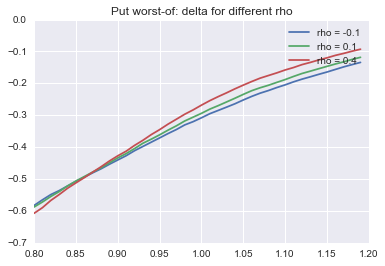

In [19]:
#put worst of delta

D1 =  1 /(2*eps) *(Put_wo(S1 + eps, S2,r, t, T, K, sigma1,sigma2, -0.1, gauss ) - Put_wo(S1 -eps, S2,r, t, T, K, sigma1,sigma2, -0.1, gauss))
D2 =  1 /(2*eps) *(Put_wo(S1 + eps, S2,r, t, T, K, sigma1,sigma2, 0.1, gauss ) - Put_wo(S1 -eps, S2,r, t, T, K, sigma1,sigma2, 0.1, gauss))
D3 =  1 /(2*eps) *(Put_wo(S1 + eps, S2,r, t, T, K, sigma1,sigma2, 0.4, gauss ) - Put_wo(S1 -eps, S2,r, t, T, K, sigma1,sigma2, 0.4, gauss))

plt.plot(S1, D1, label = 'rho = -0.1' )
plt.plot(S1, D2, label = 'rho = 0.1' )
plt.plot(S1, D3, label = 'rho = 0.4' )

plt.title('Put worst-of: delta for different rho')
plt.legend()
plt.show()

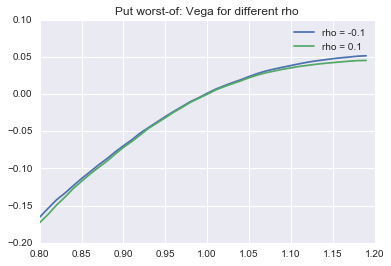

In [23]:
#put worst of vega


V1 =  1 /(2*eps) *(Put_wo(S1, S2,r, t, T, K, sigma1 + eps,sigma2, -0.1, gauss ) - Put_wo(S1 -eps, S2,r, t, T, K, sigma1,sigma2, -0.1, gauss))
V2 =  1 /(2*eps) *(Put_wo(S1, S2,r, t, T, K, sigma1 + eps,sigma2, 0.1, gauss ) - Put_wo(S1 -eps, S2,r, t, T, K, sigma1,sigma2, 0.1, gauss))
#V3 =  1 /(2*eps) *(Put_wo(S1+ eps, S2,r, t, T, K, sigma1 + eps,sigma2, 0.4, gauss ) - Put_wo(S1 -eps, S2,r, t, T, K, sigma1,sigma2, 0.4, gauss))

plt.plot(S1, V1, label = 'rho = -0.1' )
plt.plot(S1, V2, label = 'rho = 0.1' )
#plt.plot(S1, V3, label = 'rho = 0.4' )

plt.title('Put worst-of: Vega for different rho')
plt.legend()
plt.show()